In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
lstm_train = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/LSTM train_data_with_estimate_and_true.csv')
lstm_test = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/LSTM test_data_with_estimate_and_true.csv')
convlstm_train = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/convlstm train_data_with_estimate_and_true.csv')
convlstm_test = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/convlstm test_data_with_estimate_and_true.csv')
cnn_rnn_train = pd.read_csv('//Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/CNN_RNN train_data_with_estimate_and_true.csv')
cnn_rnn_test = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/CNN_RNN test_data_with_estimate_and_true.csv')


/var/folders/j9/ryqgqp6n03schy65y0b0g4sm0000gn/T/ipykernel_74198/858396707.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lstm_test = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/LSTM test_data_with_estimate_and_true.csv')
/var/folders/j9/ryqgqp6n03schy65y0b0g4sm0000gn/T/ipykernel_74198/858396707.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  convlstm_test = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicting-Option-Price-main 4/output/convlstm test_data_with_estimate_and_true.csv')
/var/folders/j9/ryqgqp6n03schy65y0b0g4sm0000gn/T/ipykernel_74198/858396707.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  cnn_rnn_test = pd.read_csv('/Users/apple/Downloads/3D-Tensor-based-Deep-Learning-Models-for-Predicti

In [3]:
print(lstm_train.head())
print(lstm_test.head())
print(convlstm_train.head())
print(convlstm_test.head())
print(cnn_rnn_train.head())
print(cnn_rnn_test.head())

      optID  time  tradeDate  inventory(k)   contractType  dayToExpire    iv  \
0  10001025     1  2018/4/16          3.275             0           72  25.4   
1  10001025     2  2018/4/17          3.495             0           71  24.9   
2  10001025     3  2018/4/18          3.675             0           70  24.7   
3  10001025     4  2018/4/19          3.682             0           69  23.3   
4  10001025     5  2018/4/20          3.783             0           68  22.2   

   strikePrice   delta    gamma  ...   theta    vega  pre_settlePrice  \
0        2.651  1.0000   0.0000  ... -0.0003  0.0000           0.1653   
1        2.651  0.0442  35.7966  ...  0.0000  0.0011           0.1303   
2        2.651  1.0000   0.0041  ... -0.0003  0.0000           0.1124   
3        2.651  1.0000   0.0000  ... -0.0003  0.0000           0.1187   
4        2.651  0.9838  15.2264  ... -0.0003  0.0005           0.1312   

   settlePrice_chg  spotPrice  theoryMargin  theoryPrice  settlePrice  \
0      

In [7]:
lstm_train.columns

Index(['optID', 'time', 'tradeDate', 'inventory(k) ', 'contractType',
       'dayToExpire', 'iv', 'strikePrice', 'delta', 'gamma', 'rho', 'theta',
       'vega', 'pre_settlePrice', 'settlePrice_chg', 'spotPrice',
       'theoryMargin', 'theoryPrice', 'settlePrice', 'Estimate_Price',
       'True_Price'],
      dtype='object')

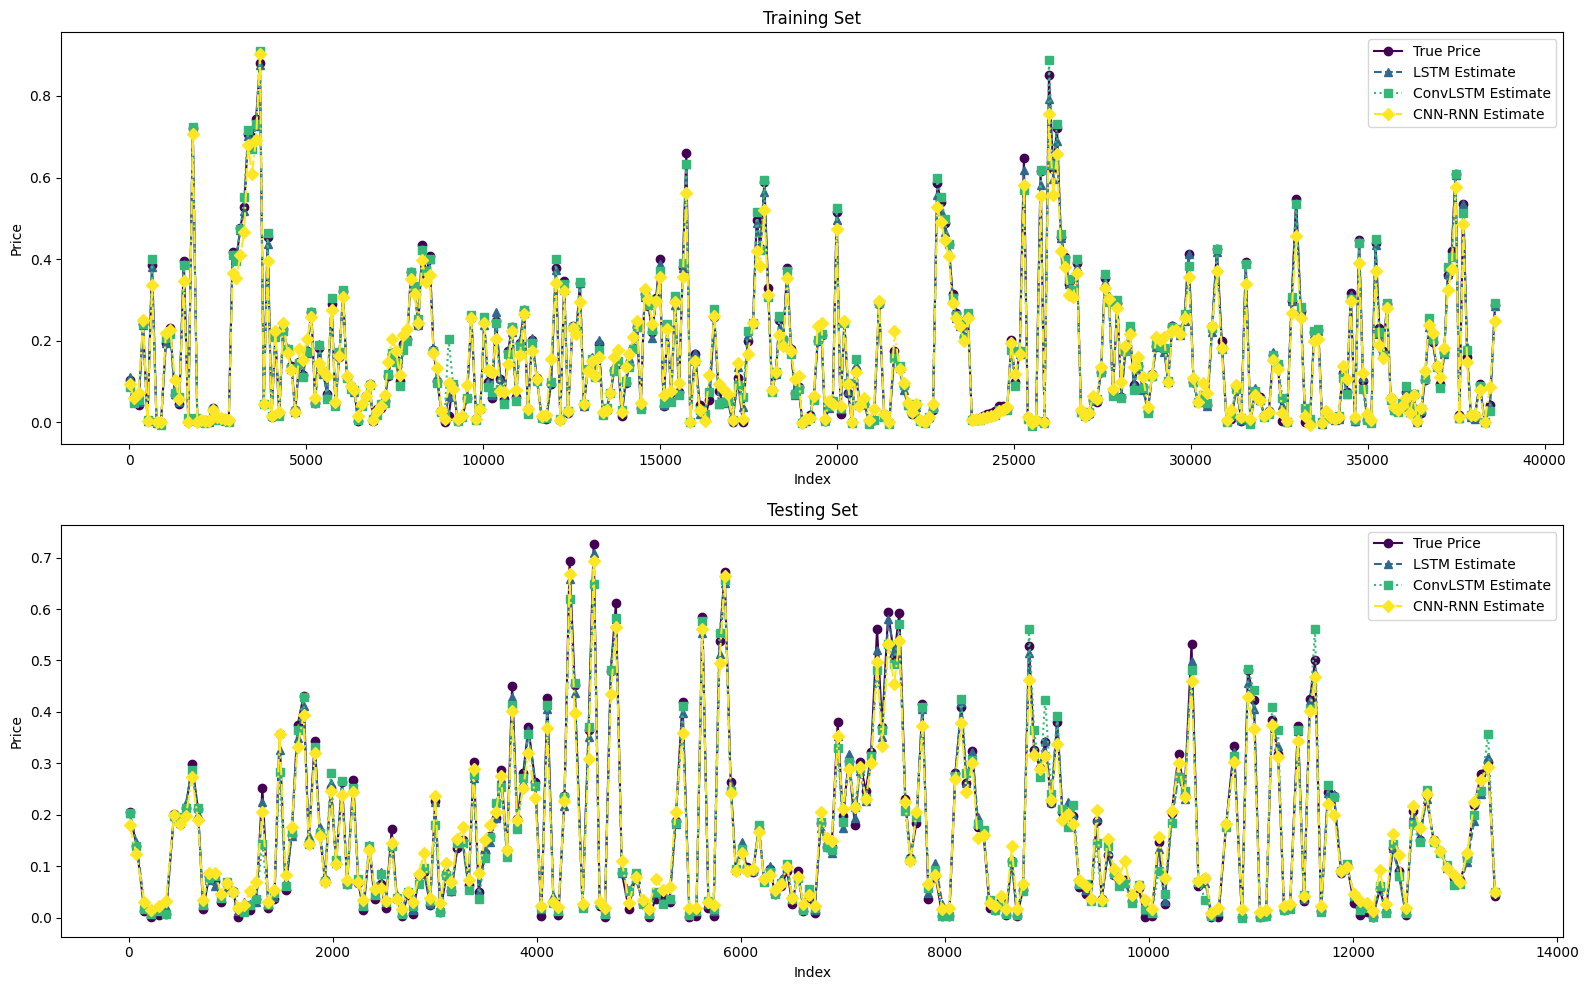

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def process_data(train_data, test_data, model_name):
    # Remove missing values and 0 values
    train_data = train_data[(train_data['True_Price'].notnull()) & (train_data['True_Price'] != 0) &
                            (train_data['Estimate_Price'].notnull()) & (train_data['Estimate_Price'] != 0)]
    test_data = test_data[(test_data['True_Price'].notnull()) & (test_data['True_Price'] != 0) &
                          (test_data['Estimate_Price'].notnull()) & (test_data['Estimate_Price'] != 0)]
    
    # Extract True_Price and Estimate_Price columns
    train_true_price = train_data['True_Price']
    train_estimate_price = train_data['Estimate_Price']
    test_true_price = test_data['True_Price']
    test_estimate_price = test_data['Estimate_Price']
    
    return train_true_price, train_estimate_price, test_true_price, test_estimate_price

# process data for the LSTM model
lstm_train_true, lstm_train_estimate, lstm_test_true, lstm_test_estimate = process_data(lstm_train, lstm_test, 'LSTM')

# process data for ConvLSTM model
convlstm_train_true, convlstm_train_estimate, convlstm_test_true, convlstm_test_estimate = process_data(convlstm_train, convlstm_test, 'ConvLSTM')

# process data for CNN-RNN model
cnn_rnn_train_true, cnn_rnn_train_estimate, cnn_rnn_test_true, cnn_rnn_test_estimate = process_data(cnn_rnn_train, cnn_rnn_test, 'CNN-RNN')

# Sample the training data every 100 data points
train_sample_interval = 100
lstm_train_true_sampled = lstm_train_true[::train_sample_interval]
lstm_train_estimate_sampled = lstm_train_estimate[::train_sample_interval]
convlstm_train_estimate_sampled = convlstm_train_estimate[::train_sample_interval]
cnn_rnn_train_estimate_sampled = cnn_rnn_train_estimate[::train_sample_interval]

# Sample the test set data every 50 data points
test_sample_interval = 50
lstm_test_true_sampled = lstm_test_true[::test_sample_interval]
lstm_test_estimate_sampled = lstm_test_estimate[::test_sample_interval]
convlstm_test_estimate_sampled = convlstm_test_estimate[::test_sample_interval]
cnn_rnn_test_estimate_sampled = cnn_rnn_test_estimate[::test_sample_interval]

# plot a line chart
plt.figure(figsize=(16, 10))

# plot a line chart of the training set
plt.subplot(2, 1, 1)
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(lstm_train_true_sampled.index, lstm_train_true_sampled, label='True Price', linestyle='-', marker='o', color=colors[0])
plt.plot(lstm_train_estimate_sampled.index, lstm_train_estimate_sampled, label='LSTM Estimate', linestyle='--', marker='^', color=colors[1])
plt.plot(convlstm_train_estimate_sampled.index, convlstm_train_estimate_sampled, label='ConvLSTM Estimate', linestyle=':', marker='s', color=colors[2])
plt.plot(cnn_rnn_train_estimate_sampled.index, cnn_rnn_train_estimate_sampled, label='CNN-RNN Estimate', linestyle='-.', marker='D', color=colors[3])
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Training Set')
plt.legend()

# Plot a line chart of the test set
plt.subplot(2, 1, 2)
plt.plot(lstm_test_true_sampled.index, lstm_test_true_sampled, label='True Price', linestyle='-', marker='o', color=colors[0])
plt.plot(lstm_test_estimate_sampled.index, lstm_test_estimate_sampled, label='LSTM Estimate', linestyle='--', marker='^', color=colors[1])
plt.plot(convlstm_test_estimate_sampled.index, convlstm_test_estimate_sampled, label='ConvLSTM Estimate', linestyle=':', marker='s', color=colors[2])
plt.plot(cnn_rnn_test_estimate_sampled.index, cnn_rnn_test_estimate_sampled, label='CNN-RNN Estimate', linestyle='-.', marker='D', color=colors[3])
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Testing Set')
plt.legend()

plt.tight_layout()
plt.show()